Exploratory Data Analysis and Data Visualization of the State and Gender Variables

In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read in data
df = pd.read_csv("../data/cleaned_data/data_cleaned.csv")

# view the first few rows
df.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Unnamed: 0,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,0,Admit,California,3.90,6.7,962.0,100.0,1,0
1,1,Admit,Florida,3.80,1.4,969.0,97.0,1,4
2,3,Admit,Colorado,3.60,0.9,969.0,97.0,0,2
3,6,Admit,California,3.88,1.5,967.0,95.0,1,5
4,7,Admit,California,3.70,1.2,969.0,94.0,1,2


In [3]:
# look at the shape of the dataframe
df.shape

(79, 9)

In [4]:
# look at some descriptive statistics
df.describe()

,Unnamed: 0,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,45.683544,3.492911,2.159494,868.873418,82.632911,0.569620,2.443038
std,24.686000,0.307809,1.782070,82.003966,13.117983,0.498293,1.700278
min,0.000000,2.340000,0.000000,751.000000,11.000000,0.000000,0.000000
25%,26.500000,3.395000,1.200000,769.000000,77.000000,0.000000,1.000000
50%,46.000000,3.540000,1.600000,868.000000,84.000000,1.000000,2.000000
75%,65.500000,3.700000,2.700000,965.000000,92.000000,1.000000,4.000000
max,87.000000,3.930000,9.200000,969.000000,100.000000,1.000000,5.000000


In [5]:
# look at the distribution of gender
df["Gender"].value_counts()

Gender
1    45
0    34
Name: count, dtype: int64

34 Male Applicants and 45 Female Applicants

In [6]:
# look at the distribution of states
df["State"].value_counts()

State
Florida        35
Colorado       17
California     12
Utah            6
Virginia        4
Oregon          1
Mississippi     1
New York        1
Alabama         1
Vermont         1
Name: count, dtype: int64

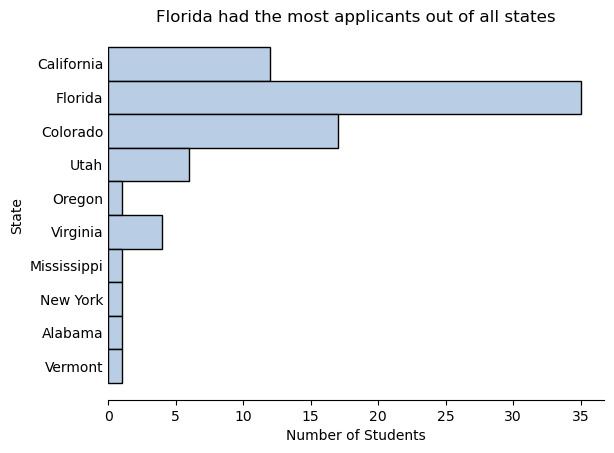

In [155]:
# visualize state distribution
g = sns.histplot(data=df, y="State", color="#a2bedb")
plt.xlabel("Number of Students")
plt.title("Florida had the most applicants out of all states")
plt.tick_params(axis="y", which="both", length=0)
sns.despine(left=True)
plt.show()

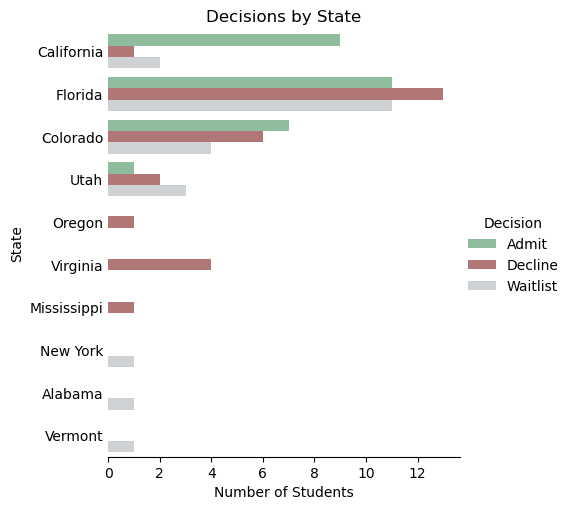

In [138]:
custom_palette = {'Admit': '#87c499', 'Decline': '#ba6e6e', 'Waitlist': 
                  '#ced2d6'}
g = sns.catplot(data=df, kind="count", y="State", hue="Decision", palette=custom_palette)
g.despine(left=True)
g.ax.tick_params(axis="y", which="both", length=0)
plt.xlabel("Number of Students")
plt.title("Decisions by State")
plt.show()

In [123]:
counts = df[["Gender", "Decision"]].value_counts().reset_index(name="Count")
counts["Percentage"] = counts["Count"] / counts.groupby("Gender")["Count"].transform("sum") * 100
counts

,Gender,Decision,Count,Percentage
0,1,Admit,16,35.555556
1,1,Decline,16,35.555556
2,1,Waitlist,13,28.888889
3,0,Admit,12,35.294118
4,0,Decline,12,35.294118
5,0,Waitlist,10,29.411765


In [124]:
pivot_data = counts.pivot(index="Gender", columns="Decision", values="Percentage").fillna(0)


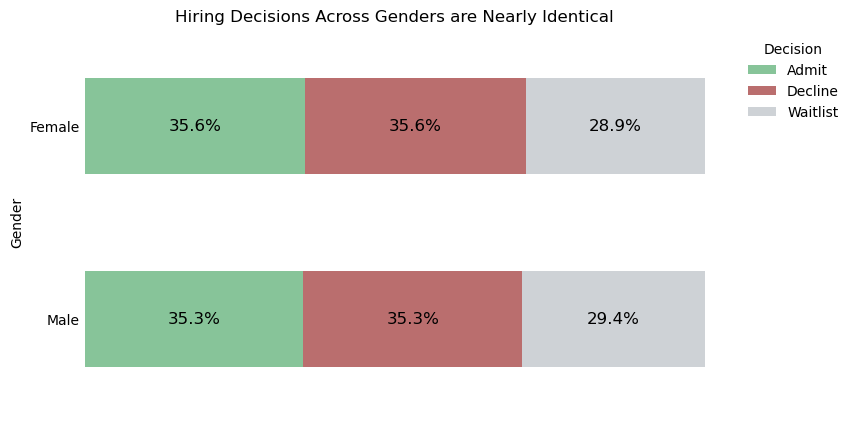

In [125]:
custom_palette = {'Admit': '#87c499', 'Decline': '#ba6e6e', 'Waitlist': 
                  '#ced2d6'}

fig, ax = plt.subplots(figsize=(8, 5))
bars = pivot_data.plot(kind="barh", stacked=True, ax=ax, color=[custom_palette[col] for col in pivot_data.columns])

# Add labels inside bars
for gender_index, (gender, row) in enumerate(pivot_data.iterrows()):
    left_offset = 0  # Track the start position for stacking
    for decision, value in row.items():
        if value > 0:  # Only label non-zero values
            ax.text(left_offset + value / 2, gender_index, f"{value:.1f}%", 
                    ha='center', va='center', fontsize=12, color="black")
        left_offset += value  # Update start position for next segment

# Formatting
plt.xlabel("")
plt.ylabel("Gender")
plt.title("Hiring Decisions Across Genders are Nearly Identical")
plt.legend(title="Decision", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=False)
plt.xlim(0, 100)  # Ensure percentages go from 0 to 100%
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
#ax.set_xticks([0, 1])  # Positions for the labels
ax.set_yticklabels(["Male", "Female"])  # Labels to replace 0 and 1

plt.show()

In [127]:
counts = df[["State", "Decision"]].value_counts().reset_index(name="Count")
counts["Percentage"] = counts["Count"] / counts.groupby("State")["Count"].transform("sum") * 100
counts

,State,Decision,Count,Percentage
0,Florida,Decline,13,37.142857
1,Florida,Waitlist,11,31.428571
2,Florida,Admit,11,31.428571
3,California,Admit,9,75.000000
4,Colorado,Admit,7,41.176471
5,Colorado,Decline,6,35.294118
6,Virginia,Decline,4,100.000000
7,Colorado,Waitlist,4,23.529412
8,Utah,Waitlist,3,50.000000
9,California,Waitlist,2,16.666667


In [128]:
pivot_data = counts.pivot(index="State", columns="Decision", values="Percentage").fillna(0)

In [46]:
pivot_data

Decision,Admit,Decline,Waitlist
State,,,
Alabama,0.000000,0.000000,100.000000
California,75.000000,8.333333,16.666667
Colorado,41.176471,35.294118,23.529412
Florida,31.428571,37.142857,31.428571
Mississippi,0.000000,100.000000,0.000000
New York,0.000000,0.000000,100.000000
Oregon,0.000000,100.000000,0.000000
Utah,16.666667,33.333333,50.000000
Vermont,0.000000,0.000000,100.000000


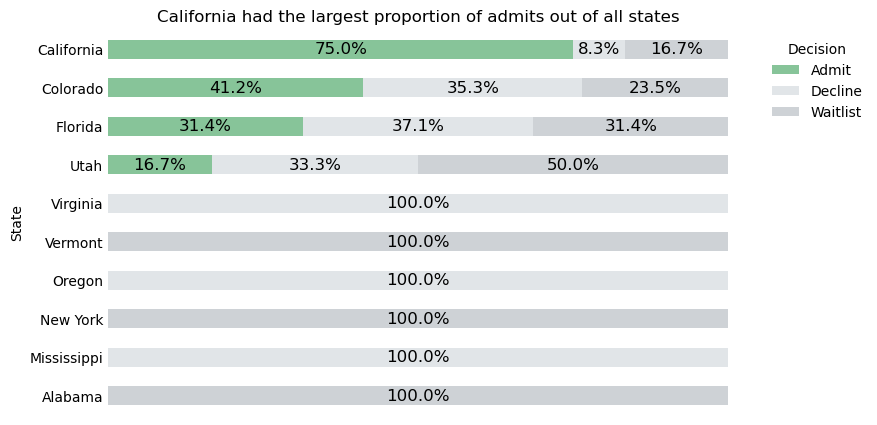

In [129]:
custom_palette = {'Admit': '#87c499', 'Decline': '#e1e5e8', 'Waitlist': 
                  '#ced2d6'}
fig, ax = plt.subplots(figsize=(8, 5))
pivot_data = pivot_data.sort_values(by='Admit', ascending=True)
bars = pivot_data.plot(kind="barh", stacked=True, ax=ax, color=[custom_palette[col] for col in pivot_data.columns])

# Add labels inside bars
for gender_index, (gender, row) in enumerate(pivot_data.iterrows()):
    left_offset = 0  # Track the start position for stacking
    for decision, value in row.items():
        if value > 0:  # Only label non-zero values
            ax.text(left_offset + value / 2, gender_index, f"{value:.1f}%", 
                    ha='center', va='center', fontsize=12, color="black")
        left_offset += value  # Update start position for next segment

# Formatting
plt.xlabel("")
plt.ylabel("State")
plt.title("California had the largest proportion of admits out of all states")
plt.legend(title="Decision", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=False)
plt.xlim(0, 100)  # Ensure percentages go from 0 to 100%
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
plt.show()

In [62]:
subset = df.drop(columns=["Decision", "State", "Unnamed: 0"])
subset.groupby(by="Gender").mean().reset_index()

,Gender,GPA,WorkExp,TestScore,WritingScore,VolunteerLevel
0,0,3.472647,2.329412,865.117647,82.735294,2.294118
1,1,3.508222,2.031111,871.711111,82.555556,2.555556


In [64]:
subset = df.drop(columns=["Gender", "State", "Unnamed: 0"])
subset.groupby(by="Decision").mean().reset_index()

,Decision,GPA,WorkExp,TestScore,WritingScore,VolunteerLevel
0,Admit,3.738571,2.075000,960.250000,91.214286,2.178571
1,Decline,3.252500,2.200000,780.107143,74.142857,2.571429
2,Waitlist,3.486522,2.213043,865.695652,82.521739,2.608696


In [65]:
subset = df.drop(columns=["Gender", "Decision", "Unnamed: 0"])
subset.groupby(by="State").mean().reset_index()

,State,GPA,WorkExp,TestScore,WritingScore,VolunteerLevel
0,Alabama,3.410000,1.200000,868.000000,85.000000,0.000000
1,California,3.600833,2.808333,916.166667,90.833333,2.666667
2,Colorado,3.448824,1.882353,871.823529,84.647059,2.352941
3,Florida,3.559143,2.117143,872.571429,80.428571,2.457143
4,Mississippi,2.910000,6.200000,753.000000,77.000000,1.000000
5,New York,3.550000,2.200000,866.000000,74.000000,1.000000
6,Oregon,2.900000,0.900000,769.000000,87.000000,4.000000
7,Utah,3.443333,1.250000,850.666667,78.333333,2.500000
8,Vermont,3.530000,3.300000,862.000000,85.000000,1.000000
9,Virginia,3.142500,2.375000,766.000000,76.500000,3.250000


Female students have higher GPAs, Volunteer Levels, Test Scores but Men have more work experience and better Writing Scores.

In [69]:
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['State'], df['Decision'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

Chi-Square Statistic: 28.752937696817852
P-value: 0.051483390524800624
Degrees of Freedom: 18
Expected Frequencies Table:
[[ 0.35443038  0.35443038  0.29113924]
 [ 4.25316456  4.25316456  3.49367089]
 [ 6.02531646  6.02531646  4.94936709]
 [12.40506329 12.40506329 10.18987342]
 [ 0.35443038  0.35443038  0.29113924]
 [ 0.35443038  0.35443038  0.29113924]
 [ 0.35443038  0.35443038  0.29113924]
 [ 2.12658228  2.12658228  1.74683544]
 [ 0.35443038  0.35443038  0.29113924]
 [ 1.41772152  1.41772152  1.16455696]]


In [149]:
#sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")

# Display the plot
#plt.title('Heatmap of Contingency Table')
#plt.show()

In [67]:
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Decision'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

Chi-Square Statistic: 0.002565663946738143
P-value: 0.9987179905038293
Degrees of Freedom: 2
Expected Frequencies Table:
[[12.05063291 12.05063291  9.89873418]
 [15.94936709 15.94936709 13.10126582]]


In [151]:
#sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")

# Display the plot
#plt.title('Heatmap of Contingency Table')
#plt.show()

In [152]:
#sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)